In [189]:
import pandas_datareader.data as web
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
import datetime

In [190]:
# define instruments to download
companies_dict = {
'American Express Co':	'AXP',
'Amgen Inc':	'AMGN',
'Apple Inc':	'AAPL',
'Boeing Co':	'BA',
'Caterpillar Inc':	'CAT',
'Cisco Systems Inc':	'CSCO',
'Chevron Corp':	'CVX',
'Goldman Sachs Group Inc':	'GS',
'Home Depot Inc':	'HD',
'Honeywell International Inc':	'HON',
'International Business Machines Corp':	'IBM',
'Intel Corp':	'INTC',
'Johnson & Johnson':	'JNJ',
'Coca-Cola Co':	'KO',
'JPMorgan Chase & Co':	'JPM',
'McDonald’s Corp':	'MCD',
'Merck & Co Inc':	'MRK',
'Microsoft Corp':	'MSFT',
'Nike Inc':	'NKE',
'Procter & Gamble Co':	'PG',
'Travelers Companies Inc':	'TRV',
'UnitedHealth Group Inc':	'UNH',
'Salesforce.Com Inc':	'CRM',
'Verizon Communications Inc':	'VZ',
'Visa Inc':	'V',
'Walgreens Boots Alliance Inc':	'WBA',
'Walmart Inc':	'WMT',
'Walt Disney Co':	'DIS',
'Dow Inc':'DOW'

}
companies = sorted(companies_dict.items(), key=lambda x: x[1])


In [191]:
# Define which online source to use
data_source = 'yahoo'

# define start and end dates
start_date = '10/24/2019'
end_date = '10/27/2021'

# Use pandas_datareader.data.DataReader to load the desired data list(companies_dict.values()) used for python 3 compatibility
panel_data = web.DataReader(list(companies_dict.values()), data_source, start_date, end_date)

print(panel_data.axes)

[DatetimeIndex(['2019-10-24', '2019-10-25', '2019-10-28', '2019-10-29',
               '2019-10-30', '2019-10-31', '2019-11-01', '2019-11-04',
               '2019-11-05', '2019-11-06',
               ...
               '2021-10-14', '2021-10-15', '2021-10-18', '2021-10-19',
               '2021-10-20', '2021-10-21', '2021-10-22', '2021-10-25',
               '2021-10-26', '2021-10-27'],
              dtype='datetime64[ns]', name='Date', length=507, freq=None), MultiIndex([('Adj Close',  'AXP'),
            ('Adj Close', 'AMGN'),
            ('Adj Close', 'AAPL'),
            ('Adj Close',   'BA'),
            ('Adj Close',  'CAT'),
            ('Adj Close', 'CSCO'),
            ('Adj Close',  'CVX'),
            ('Adj Close',   'GS'),
            ('Adj Close',   'HD'),
            ('Adj Close',  'HON'),
            ...
            (   'Volume',   'PG'),
            (   'Volume',  'TRV'),
            (   'Volume',  'UNH'),
            (   'Volume',  'CRM'),
            (   'Volume',   

In [192]:

# Find Stock Open and Close Values
stock_close = panel_data['Close']
stock_open = panel_data['Open']

print(stock_close.iloc[0])

Symbols
AXP     116.410004
AMGN    203.059998
AAPL     60.895000
BA      344.549988
CAT     133.850006
CSCO     46.410000
CVX     117.580002
GS      211.050003
HD      233.889999
HON     171.460007
IBM     134.070007
INTC     52.230000
JNJ     127.500000
KO       54.610001
JPM     125.029999
MCD     196.020004
MRK      78.797707
MSFT    139.940002
NKE      91.500000
PG      124.790001
TRV     131.429993
UNH     244.509995
CRM     148.119995
VZ       60.580002
V       176.160004
WBA      54.450001
WMT     119.099998
DIS     130.259995
DOW      49.470001
Name: 2019-10-24 00:00:00, dtype: float64


In [193]:
# Calculate daily stock movement
stock_close = np.array(stock_close).T
stock_open = np.array(stock_open).T

row, col = stock_close.shape

# create movements dataset filled with 0's
movements = np.zeros([row, col])

for i in range(0, row):
 movements[i,:] = np.subtract(stock_close[i,:], stock_open[i,:])

In [194]:
companies[i][1]

'WMT'

In [195]:
movmts = []
for i in range(0, len(companies)):
 print('Company: {}, Ticker: {}, Change: {}'.format(companies[i][0],companies[i][1], sum(movements[i][:])))
 movmts.append([companies[i][0],companies[i][1], sum(movements[i][:])])
movmts 
movmts_df = pd.DataFrame(movmts, columns=['Company', 'Symbol', 'Movement'])
movmts_df

Company: Apple Inc, Ticker: AAPL, Change: 9.950027465820312
Company: Amgen Inc, Ticker: AMGN, Change: 36.42521667480469
Company: American Express Co, Ticker: AXP, Change: 34.62727355957031
Company: Boeing Co, Ticker: BA, Change: -333.5151901245117
Company: Caterpillar Inc, Ticker: CAT, Change: 23.555221557617188
Company: Salesforce.Com Inc, Ticker: CRM, Change: 16.984966278076172
Company: Cisco Systems Inc, Ticker: CSCO, Change: -28.739959716796875
Company: Chevron Corp, Ticker: CVX, Change: 71.36013793945312
Company: Walt Disney Co, Ticker: DIS, Change: 111.84951782226562
Company: Dow Inc, Ticker: DOW, Change: 15.289878845214844
Company: Goldman Sachs Group Inc, Ticker: GS, Change: -10.82000732421875
Company: Home Depot Inc, Ticker: HD, Change: 6.110050201416016
Company: Honeywell International Inc, Ticker: HON, Change: 1.0900421142578125
Company: International Business Machines Corp, Ticker: IBM, Change: -19.360008239746094
Company: Intel Corp, Ticker: INTC, Change: 5.179840087890625

,Company,Symbol,Movement
0,Apple Inc,AAPL,9.950027
1,Amgen Inc,AMGN,36.425217
2,American Express Co,AXP,34.627274
3,Boeing Co,BA,-333.515190
4,Caterpillar Inc,CAT,23.555222
5,Salesforce.Com Inc,CRM,16.984966
6,Cisco Systems Inc,CSCO,-28.739960
7,Chevron Corp,CVX,71.360138
8,Walt Disney Co,DIS,111.849518
9,Dow Inc,DOW,15.289879


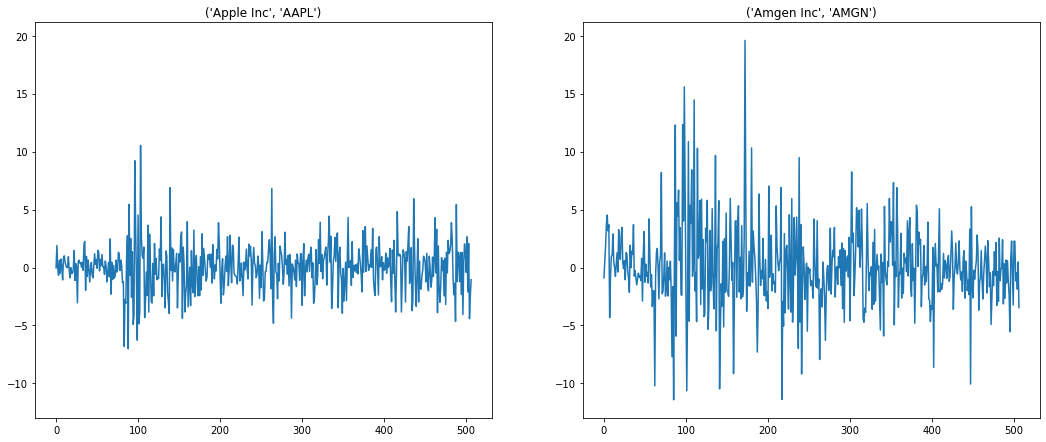

In [196]:
plt.figure(figsize=(18,16))
ax1 = plt.subplot(221)
plt.plot(movements[0][:])
plt.title(companies[0])

plt.subplot(222, sharey=ax1)
plt.plot(movements[1][:])
plt.title(companies[1])
plt.show()

In [197]:
import numpy as np
movements
where_are_NaNs = np.isnan(movements)
movements[where_are_NaNs] = 0
movements

array([[-0.02999878,  1.90000153, -0.05999756, ..., -4.41999817,
        -2.47000122, -1.05000305],
       [-0.88999939,  0.46000671,  1.83999634, ..., -1.86999512,
         0.47999573, -3.46499634],
       [-0.23249817,  0.85499954,  0.40750122, ..., -0.03999329,
        -0.00999451, -0.04499817],
       ...,
       [-0.05000305,  0.04000092, -0.02999878, ...,  1.27999878,
        -1.25      , -0.99000549],
       [-1.26000977,  0.3999939 , -0.91999817, ...,  2.11000061,
        -0.91000366, -1.48150635],
       [ 0.81999969,  0.70000076,  0.45999908, ..., -0.53000259,
         0.        , -1.54500198]])

In [198]:
# import Normalizer
from sklearn.preprocessing import Normalizer
# create the Normalizer
normalizer = Normalizer()

new = normalizer.fit_transform(movements)

print(new.max())
print(new.min())
print(new.mean())

0.31837438903224513
-0.30845270936499875
6.735705370537311e-05


In [199]:
# import machine learning libraries
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

# define normalizer
normalizer = Normalizer()

# create a K-means model with 10 clusters
kmeans = KMeans(n_clusters=10, max_iter=1000)

# make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer,kmeans)

In [200]:
panel_data

Attributes   Adj Close                                                  \
Symbols            AXP        AMGN        AAPL          BA         CAT   
Date                                                                     
2019-10-24  113.050385  192.002106   59.911396  340.524902  127.979668   
2019-10-25  114.846985  191.992630   60.649288  335.860046  133.601776   
2019-10-28  115.157753  193.845886   61.256809  336.897766  133.917282   
2019-10-29  114.031227  197.609161   59.840069  344.853729  135.131592   
2019-10-30  114.662476  199.396255   59.832691  342.017273  134.185013   
...                ...         ...         ...         ...         ...   
2021-10-21  177.470001  208.990005  149.479996  214.339996  202.139999   
2021-10-22  187.080002  209.240005  148.690002  212.970001  200.649994   
2021-10-25  182.309998  207.630005  148.639999  212.869995  202.210007   
2021-10-26  180.949997  208.679993  149.320007  209.809998  199.639999   
2021-10-27  179.050003  206.404999  149.315002  207.065002  196.054993   

Attributes                                                             ...  \
Symbols          CSCO         CVX          GS          HD         HON  ...   
Date                                                                   ...   
2019-10-24  43.589859  105.911476  202.458374  223.320541  164.629974  ...   
2019-10-25  44.050083  106.893303  205.508896  223.788422  164.793198  ...   
2019-10-28  44.303677  106.722160  208.885620  226.099075  165.801376  ...   
2019-10-29  44.369427  106.406891  208.780106  223.559280  166.262268  ...   
2019-10-30  44.669979  104.812553  207.024582  225.564377  167.644882  ...   
...               ...         ...         ...         ...         ...  ...   
2021-10-21  55.689999  111.739998  407.589996  364.619995  224.520004  ...   
2021-10-22  55.110001  112.800003  414.320007  365.989990  217.399994  ...   
2021-10-25  55.139999  113.849998  414.750000  371.260010  217.539993  ...   
2021-10-26  55.810001  114.099998  417.609985  369.200012  218.320007  ...   
2021-10-27  56.174999  112.230003  412.109985  373.640015  217.160004  ...   

Attributes     Volume                                               \
Symbols            PG        TRV        UNH        CRM          VZ   
Date                                                                 
2019-10-24  6725600.0  1281500.0  2546900.0  5280100.0  11143800.0   
2019-10-25  6093300.0  1342300.0  2815100.0  4991400.0  15036400.0   
2019-10-28  5459500.0  1525500.0  2957100.0  7576700.0  14621400.0   
2019-10-29  5659800.0  2190700.0  3528900.0  5477300.0  10619900.0   
2019-10-30  4734500.0  1353300.0  3299600.0  4724500.0  12136500.0   
...               ...        ...        ...        ...         ...   
2021-10-21  6545500.0  1464500.0  2465100.0  2828500.0  17771100.0   
2021-10-22  5237700.0  1362800.0  2724200.0  2925000.0  15994400.0   
2021-10-25  5382100.0  1041200.0  3553500.0  2993500.0  15987400.0   
2021-10-26  6234400.0   847300.0  3103500.0  3600400.0  15184200.0   
2021-10-27  4601664.0   454975.0  1362235.0  1721829.0   6137754.0   

Attributes                                                           
Symbols              V        WBA        WMT         DIS        DOW  
Date                                                                 
2019-10-24   7872600.0  3522400.0  2900300.0   5746300.0  6098900.0  
2019-10-25  10130100.0  4806500.0  2564300.0   6696000.0  5361100.0  
2019-10-28  10086500.0  8066900.0  3404600.0   8940300.0  4504100.0  
2019-10-29   7572800.0  5968900.0  4791100.0   9305100.0  3462100.0  
2019-10-30   5374800.0  3684400.0  2996200.0  10880000.0  3602100.0  
...                ...        ...        ...         ...        ...  
2021-10-21   5982200.0  4739300.0  4651500.0   7509000.0  8916600.0  
2021-10-22   3787000.0  5149600.0  7064400.0   7846500.0  5885000.0  
2021-10-25   4938700.0  5060100.0  6429300.0   9798700.0  6293200.0  
2021-10-26   7766600.0  5806100.0  5797800.0   58

In [201]:
# fit pipeline to daily stock movements
pipeline.fit(movements)

Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(max_iter=1000, n_clusters=10))])

In [202]:
# predict cluster labels
labels = pipeline.predict(movements)

# create a DataFrame aligning labels & companies
df = pd.DataFrame({'labels': labels, 'companies': companies})

# display df sorted by cluster labels
# print(df.sort_values('labels'))
df

,labels,companies
0,5,"(Apple Inc, AAPL)"
1,1,"(Amgen Inc, AMGN)"
2,4,"(American Express Co, AXP)"
3,9,"(Boeing Co, BA)"
4,0,"(Caterpillar Inc, CAT)"
5,8,"(Salesforce.Com Inc, CRM)"
6,5,"(Cisco Systems Inc, CSCO)"
7,5,"(Chevron Corp, CVX)"
8,3,"(Walt Disney Co, DIS)"
9,0,"(Dow Inc, DOW)"


In [203]:
movmts_df


,Company,Symbol,Movement
0,Apple Inc,AAPL,9.950027
1,Amgen Inc,AMGN,36.425217
2,American Express Co,AXP,34.627274
3,Boeing Co,BA,-333.515190
4,Caterpillar Inc,CAT,23.555222
5,Salesforce.Com Inc,CRM,16.984966
6,Cisco Systems Inc,CSCO,-28.739960
7,Chevron Corp,CVX,71.360138
8,Walt Disney Co,DIS,111.849518
9,Dow Inc,DOW,15.289879


In [204]:
companies

[('Apple Inc', 'AAPL'),
 ('Amgen Inc', 'AMGN'),
 ('American Express Co', 'AXP'),
 ('Boeing Co', 'BA'),
 ('Caterpillar Inc', 'CAT'),
 ('Salesforce.Com Inc', 'CRM'),
 ('Cisco Systems Inc', 'CSCO'),
 ('Chevron Corp', 'CVX'),
 ('Walt Disney Co', 'DIS'),
 ('Dow Inc', 'DOW'),
 ('Goldman Sachs Group Inc', 'GS'),
 ('Home Depot Inc', 'HD'),
 ('Honeywell International Inc', 'HON'),
 ('International Business Machines Corp', 'IBM'),
 ('Intel Corp', 'INTC'),
 ('Johnson & Johnson', 'JNJ'),
 ('JPMorgan Chase & Co', 'JPM'),
 ('Coca-Cola Co', 'KO'),
 ('McDonald’s Corp', 'MCD'),
 ('Merck & Co Inc', 'MRK'),
 ('Microsoft Corp', 'MSFT'),
 ('Nike Inc', 'NKE'),
 ('Procter & Gamble Co', 'PG'),
 ('Travelers Companies Inc', 'TRV'),
 ('UnitedHealth Group Inc', 'UNH'),
 ('Visa Inc', 'V'),
 ('Verizon Communications Inc', 'VZ'),
 ('Walgreens Boots Alliance Inc', 'WBA'),
 ('Walmart Inc', 'WMT')]

In [205]:
# PCA
from sklearn.decomposition import PCA 

# visualize the results
reduced_data = PCA(n_components = 2).fit_transform(new)

# run kmeans on reduced data
kmeans = KMeans(n_clusters=3)
kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)

# create DataFrame aligning labels & companies
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster labbels
print(df.sort_values('labels'))

    labels                                    companies
22       0                    (Procter & Gamble Co, PG)
17       0                           (Coca-Cola Co, KO)
2        0                   (American Express Co, AXP)
15       0                     (Johnson & Johnson, JNJ)
5        0                    (Salesforce.Com Inc, CRM)
24       0                (UnitedHealth Group Inc, UNH)
8        0                        (Walt Disney Co, DIS)
18       0                       (McDonald’s Corp, MCD)
11       0                         (Home Depot Inc, HD)
16       1                   (JPMorgan Chase & Co, JPM)
21       1                              (Nike Inc, NKE)
13       1  (International Business Machines Corp, IBM)
19       1                        (Merck & Co Inc, MRK)
10       1                (Goldman Sachs Group Inc, GS)
23       1               (Travelers Companies Inc, TRV)
25       1                                (Visa Inc, V)
26       1             (Verizon Communications I

In [206]:
movmts_df['Cluster'] = labels
movmts_df.sort_values('Company')

,Company,Symbol,Movement,Cluster
2,American Express Co,AXP,34.627274,0
1,Amgen Inc,AMGN,36.425217,1
0,Apple Inc,AAPL,9.950027,2
3,Boeing Co,BA,-333.515190,2
4,Caterpillar Inc,CAT,23.555222,2
7,Chevron Corp,CVX,71.360138,2
6,Cisco Systems Inc,CSCO,-28.739960,2
17,Coca-Cola Co,KO,104.369995,0
9,Dow Inc,DOW,15.289879,2
10,Goldman Sachs Group Inc,GS,-10.820007,1


In [207]:
file_path = "Data/Analyzed/"+'DOW30'+"_Clustered_Stocks_Movement.csv"
movmts_df.to_csv(file_path, index=False)

In [208]:
file_path

'Data/Analyzed/DOW30_Clustered_Stocks_Movement.csv'

In [209]:
df

,labels,companies
0,2,"(Apple Inc, AAPL)"
1,1,"(Amgen Inc, AMGN)"
2,0,"(American Express Co, AXP)"
3,2,"(Boeing Co, BA)"
4,2,"(Caterpillar Inc, CAT)"
5,0,"(Salesforce.Com Inc, CRM)"
6,2,"(Cisco Systems Inc, CSCO)"
7,2,"(Chevron Corp, CVX)"
8,0,"(Walt Disney Co, DIS)"
9,2,"(Dow Inc, DOW)"


In [210]:
reduced_data


array([[ 0.53259262,  0.03625315],
       [-0.42093174, -0.19967306],
       [-0.27883587,  0.47417468],
       [ 0.41293791,  0.13024736],
       [ 0.40998652, -0.16802769],
       [-0.20878947,  0.03854877],
       [ 0.42417316, -0.05053635],
       [ 0.50172257,  0.00784171],
       [-0.15244953,  0.20530038],
       [ 0.291249  , -0.06385591],
       [ 0.07001833, -0.20672481],
       [-0.14545472,  0.15104969],
       [-0.41574953, -0.3605047 ],
       [-0.16203383, -0.25600528],
       [ 0.51237114, -0.1220787 ],
       [-0.05872719,  0.19316618],
       [-0.31852519, -0.30247361],
       [-0.39549266,  0.4539393 ],
       [-0.05711404,  0.3020999 ],
       [-0.45595453, -0.28994484],
       [ 0.21959453, -0.08660882],
       [-0.1533198 , -0.08817852],
       [-0.24685717,  0.64041764],
       [-0.22710062, -0.39685727],
       [-0.03731684,  0.27615177],
       [-0.01333159, -0.35789981],
       [-0.43265642, -0.12169953],
       [ 0.31265061,  0.25950927],
       [ 0.49334433,

In [211]:
data_df = pd.DataFrame(reduced_data, columns=["PC 1", "PC 2"])
print(data_df.shape)
data_df.head(10)

(29, 2)


,PC 1,PC 2
0,0.532593,0.036253
1,-0.420932,-0.199673
2,-0.278836,0.474175
3,0.412938,0.130247
4,0.409987,-0.168028
5,-0.208789,0.038549
6,0.424173,-0.050536
7,0.501723,0.007842
8,-0.152450,0.205300
9,0.291249,-0.063856


C:\Users\vmuty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


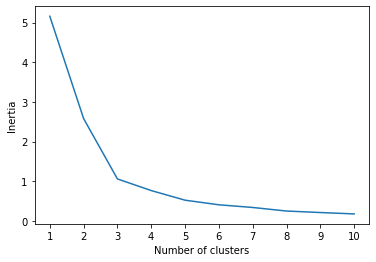

In [212]:
# Initialize empty inertia list
distortions=[]
inertia = []
# Initialize k range
k = list(range(1,11))
# Looping through k list
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(reduced_data)
    distortions.append(sum(np.min(cdist(reduced_data, km.cluster_centers_,
                                        'euclidean'), axis=1)) / new.shape[0])
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
elbow_df = pd.DataFrame(elbow_data)
plt.plot(elbow_df['k'], elbow_df['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

<Figure size 432x288 with 0 Axes>

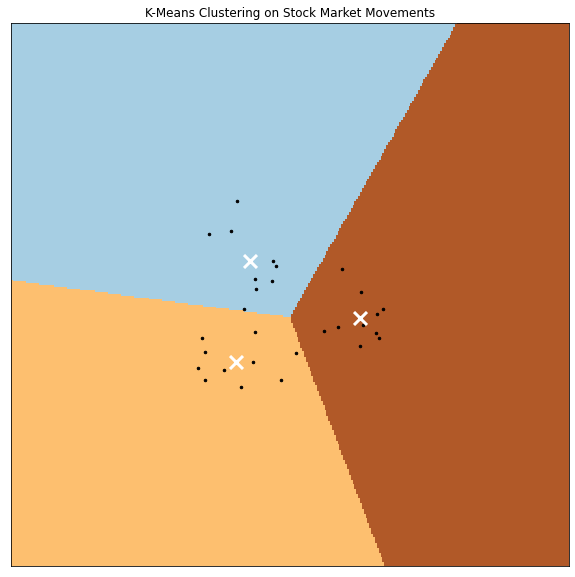

In [213]:
# Define step size of mesh
h = 0.01

# plot the decision boundary
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:,0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain abels for each point in the mesh using our trained model
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

# define colorplot
cmap = plt.cm.Paired

# plot figure
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(Z, interpolation='nearest',
 extent = (xx.min(), xx.max(), yy.min(), yy.max()),
 cmap = cmap,
 aspect = 'auto', origin='lower')
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5)


# plot the centroid of each cluster as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
 marker='x', s=169, linewidth=3,
 color='w', zorder=10)

plt.title('K-Means Clustering on Stock Market Movements')
# plt.xlim(x_min, x_max)
# plt.ylim(y_min, y_max)

ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.show()
plt.show()